# Titanic Passanger Data Analysis (In Progress)

In this project I will briefly explore the Titanic passanger data, compiled by [Kaggle](https://www.kaggle.com/c/titanic/data). I will use the `train.csv` dataset because it contains the `survived` column. Below I will explore this data to answer the following questions:



### How many passangers survived?

### Out of the passangers that survived, what was their class, age and gender makeup?
    
### What else can be seen from this data?


To accomplish this I will do the following:

1. Explore the Data
2. Clean the Data
3. Analyze the Data
4. Make Conclusions from my analysis



### 1. Explore the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('train.csv')

print(titanic.info())
print(titanic.iloc[0])
print(titanic.head())
print(titanic.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin               

In [2]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


From my brief exploration of the dataset, I can see the following:

- There are 12 columns and and 891 rows (890 passangers)
- There are certsin column names that are not clearly labeled and could benefit from renaming (`Pclass`, `SibSp`, `Parch`)
- The `Sex` column contains gender identities and could benefit from being renamed from `Sex` to `Gender`
- There are certain rows that contain data not necessary for my visualization efforts (`Name`, `Ticket`), and should be removed
- There are many rows containing missing (null) values that must be removed to allow the dataset to be read by seaborn

### 2. Clean the Data

In [3]:
titanic.columns = titanic.columns.str.replace('Pclass','Class')
titanic.columns = titanic.columns.str.replace('SibSp','Sibling_Spouse')
titanic.columns = titanic.columns.str.replace('Parch','Parent_Child')
titanic.columns = titanic.columns.str.replace('Sex','Gender')

In [4]:
columns = ['Survived', 'Class', 'Gender', 'Age', 'Sibling_Spouse', 'Parent_Child', 'Fare', 'Embarked']
titanic = titanic[columns].dropna()

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived          712 non-null int64
Class             712 non-null int64
Gender            712 non-null object
Age               712 non-null float64
Sibling_Spouse    712 non-null int64
Parent_Child      712 non-null int64
Fare              712 non-null float64
Embarked          712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [6]:
titanic.describe(include='all')

,Survived,Class,Gender,Age,Sibling_Spouse,Parent_Child,Fare,Embarked
count,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.000000,712
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554
mean,0.404494,2.240169,NaN,29.642093,0.514045,0.432584,34.567251,NaN
std,0.491139,0.836854,NaN,14.492933,0.930692,0.854181,52.938648,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.645850,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.000000,NaN


### 3. Analyze the Data

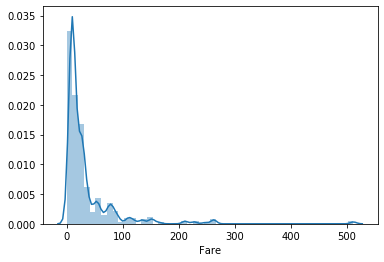

In [7]:
sns.distplot(titanic["Fare"])
plt.show()

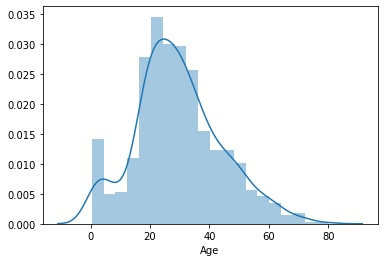

In [8]:
sns.distplot(titanic["Age"])
plt.show()

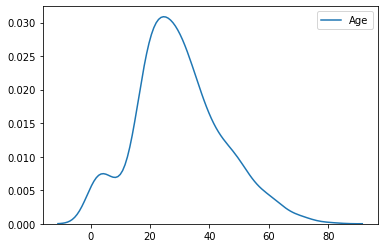

In [9]:
sns.kdeplot(titanic["Age"])
plt.show()

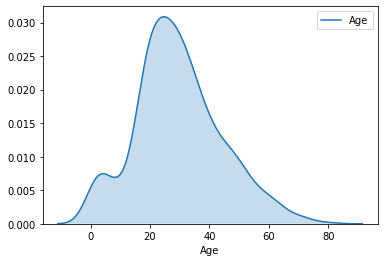

In [10]:
sns.kdeplot(titanic["Age"], shade=True)
plt.xlabel("Age")
plt.show()

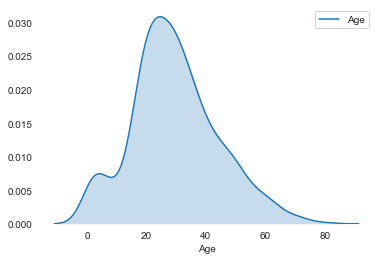

In [11]:
sns.set_style("white")
sns.kdeplot(titanic["Age"], shade=True)
plt.xlabel("Age")
sns.despine(left=True, bottom=True)
plt.show()

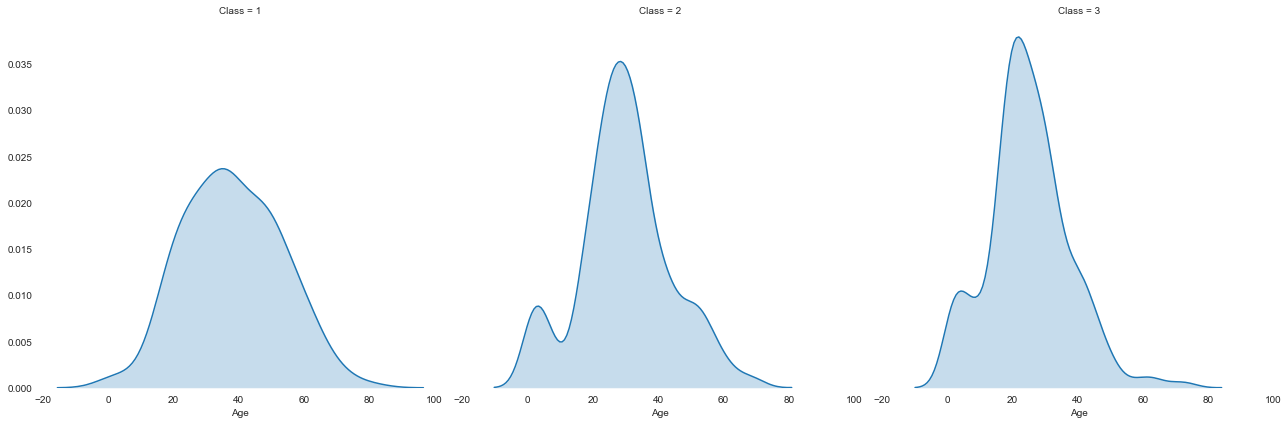

In [12]:
class_age = sns.FacetGrid(titanic, col="Class", height=6)
class_age.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

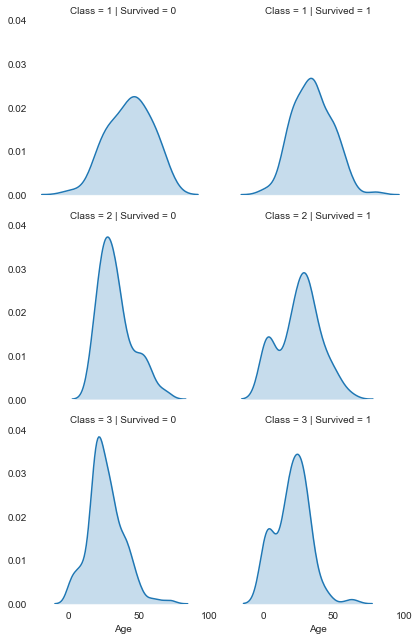

In [13]:
g = sns.FacetGrid(titanic, col="Survived", row="Class")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

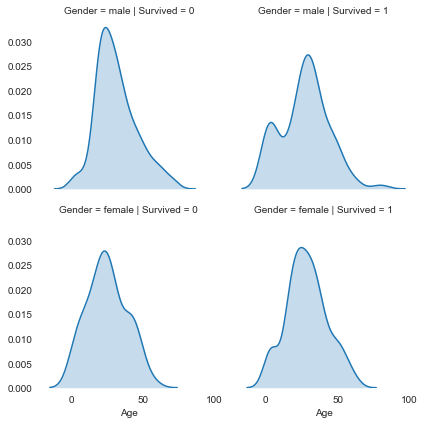

In [14]:
g = sns.FacetGrid(titanic, col="Survived", row="Gender")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

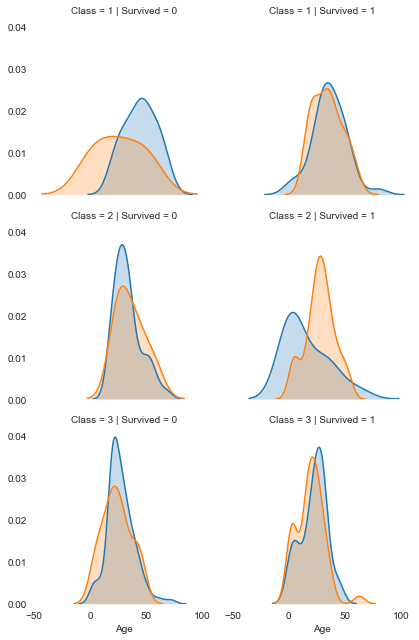

In [15]:
g = sns.FacetGrid(titanic, col="Survived", row="Class", hue="Gender", height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

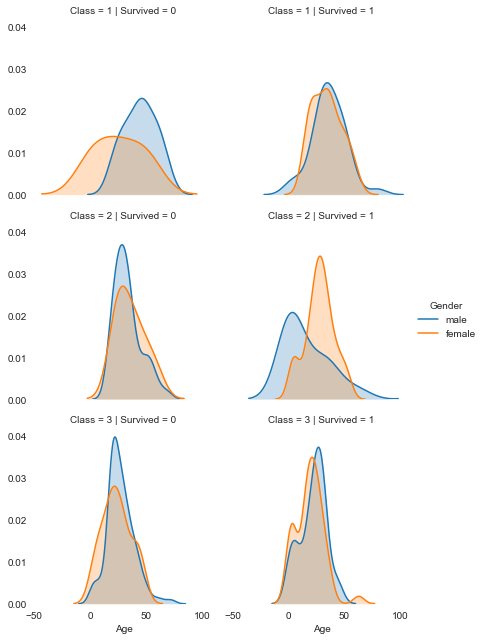

In [16]:
g = sns.FacetGrid(titanic, col="Survived", row="Class", hue="Gender", height=3)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

### 4. Conclusion